# Dataset Treemap

This was originally just an exxplorative figure, but it looks pretty cool. It might make it back to the survey.


In [1]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import squarify

from utils.utils import print_pretty_df, wrap_label
from utils.metadata import plot_colors, general_task_colors

# Quick ANSI color code shortcuts
r = "\033[31m"
y = "\033[33m"
g = "\033[32m"
b = "\033[34m"
e = "\033[0m"

pickleName = "all_datapoints.pkl"
datapointsDfPath = Path("..") / "data" / "Dataframes" / pickleName
datapointsDf = pd.read_pickle(datapointsDfPath)

Dataset not in mapping: Landsat-8 (cust.) {Classification}
Dataset not in mapping: UAV RGB (cust.) {Object Detection}
Dataset not in mapping: ALSAT-2A (cust.) {Pixel classification}
Dataset not in mapping: MSTAR {Classification}
Dataset not in mapping: UAV RGB (cust.) {Pixel classification}
Dataset not in mapping: SAR (sim.) {Regression}
Dataset not in mapping: UAV RGB (cust.) {Classification}
Dataset not in mapping: ALOS-2 (cust.) {Classification}
Dataset not in mapping: 38-Cloud {Segmentation}
Dataset not in mapping: DIOR {Object Detection}
Dataset not in mapping: MASATI {Classification}
Dataset not in mapping: DOTAv1.0 {Object Detection}
Dataset not in mapping: UAV RGB+MMW (cust.) {Object Detection}
Dataset not in mapping: Google Earth Studio RGB (sim.) {Object Detection}
Dataset not in mapping: RGB (cust.) {Classification}
Dataset not in mapping: NWPU-RESISC45 {Classification}
Dataset not in mapping: FastenerDataset (cust.) {Object Detection}
Dataset not in mapping: Sentinel-2 (cus

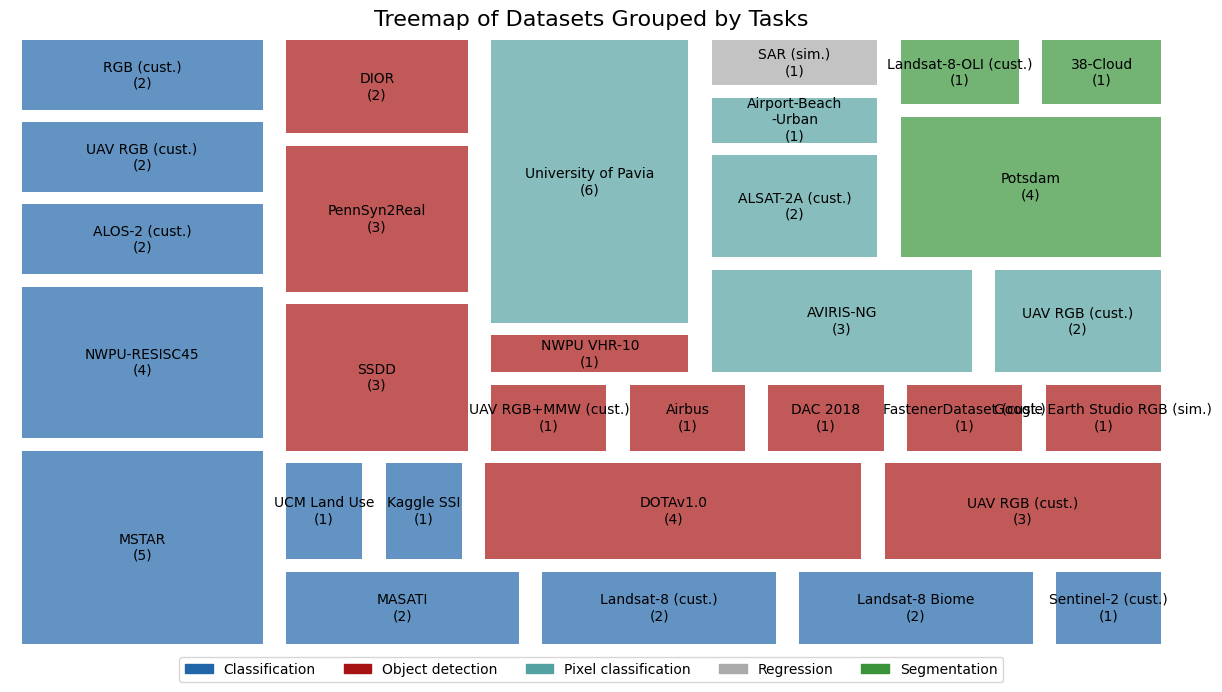

In [ ]:
def prepare_dataset_data(df):
    # Rename some of the datasets (make them shorter, etc.)
    datasetMapping: dict[str, str] = {
        "University of Pavia {Pixel classification}": "University of Pavia {Pixel classification}",
        "Multi-drone (custom) {Object Detection}": "Multi-drone (cust.) {Object Detection}",
        "Custom (UAV) {Pixel classification}": "UAV RGB (cust.) {Pixel classification}",
        "Custom (ALOS-2) {Classification}": "ALOS-2 (cust.) {Classification}",
        "L8 Biome {Classification}": "Landsat-8 Biome {Classification}",
        "Custom (UAV) {Object Detection}": "UAV RGB (cust.) {Object Detection}",
        "Custom (ALSAT-2A) {Pixel classification}": "ALSAT-2A (cust.) {Pixel classification}",
        "Custom (Landsat-8-OLI) {Segmentation}": "Landsat-8 OLI (cust.) {Segmentation}",
        "Simulated (SAR) {Regression}": "SAR (sim) {Regression}",
        "Custom (UAV) {Classification}": "UAV RGB\n(cust.) {Classification}",
        "Simulated (RGB) {Object Detection}": "Google Earth\nRGB (sim) {Object Detection}",
        "Simulated (1-D Signal) {Classification}": "1D signal (sim) {Classification}",
        "Custom (Sentinel-2) {Classification}": "Sentinel-2\n(cust.) {Classification}",
        "UC-Merced Land Use {Classification}": "UCM Land Use {Classification}",
        "Airport-Beach-Urban {Pixel classification}": "Airport-Beach\n-Urban {Pixel classification}",
        "FastenerDataset {Object Detection}": "Fastener\nDataset {Object Detection}",
        "NWPU VHR-10 {Object Detection}": "NWPU VHR-10 {Object Detection}",
        "Google Earth Studio RGB (sim) {Object Detection}": "Google Earth\nRGB (sim) {Object Detection}",
    }
    # Check if the dataset names need to be replaced
    for dataset in df["Dataset"].unique():
        if dataset not in datasetMapping:
            print(f"Dataset not in mapping: {r}{dataset}{e}")

    df.loc[:, "Dataset"] = df["Dataset"].replace(datasetMapping)

    # Generate dataset counts and tasks
    datasetCounts = df[
        ["Dataset", "Task"]
    ].value_counts()  # Count occurrences of each dataset
    # print(datasetCounts.index, '\n', len(datasetCounts))
    tasks = df["Task"].unique()  # Get the unique tasks

    # Prepare the dataset labels (without task names)
    datasetLabels = [
        label.split(" {")[0]
        for label in datasetCounts.index.get_level_values("Dataset")
    ]  # Keep only the dataset name
    counts = datasetCounts.values  # Extract the counts

    # Create labels that combine dataset name with the corresponding count
    labels = [f"{dataset}\n({count})" for dataset, count in zip(datasetLabels, counts)]

    # Create a color map to differentiate the tasks
    taskToColorDict = general_task_colors

    # Assign colors based on the task of each dataset
    colors = [
        taskToColorDict[task] for task in datasetCounts.index.get_level_values("Task")
    ]
    return datasetCounts, counts, tasks, labels, taskToColorDict, colors


def treemap_datasets_perTask_v1(df):
    """
    Function to plot a treemap of datasets and their counts using the provided tasks and dataset_counts.
    The color is mapped to the tasks.
    :param df: A DataFrame containing the columns 'Task' and 'Dataset'
    """

    datasetCounts, counts, tasks, labels, taskToColorDict, colors = prepare_dataset_data(df)

    # Sort the datasets by task to group by color
    sortedIndices = sorted(
        range(len(colors)),
        key=lambda i: datasetCounts.index.get_level_values("Task")[i],
    )
    counts = [counts[i] for i in sortedIndices]
    labels = [labels[i] for i in sortedIndices]
    colors = [colors[i] for i in sortedIndices]

    # Plotting the treemap
    plt.figure(figsize=(15, 8))

    # squarify.plot requires the 'sizes' (dataset counts) and optional 'label' and 'color'
    squarify.plot(
        sizes=counts,
        label=labels,
        color=colors,
        alpha=0.7,
        text_kwargs={"fontsize": 10},
        pad=True,
    )

    # Title and layout adjustments
    plt.title("Treemap of Datasets Grouped by Tasks", fontsize=16)
    plt.axis("off")  # Turn off the axes for better visibility

    # Add legend for each color
    handles = [plt.Rectangle((0, 0), 1, 1, color=taskToColorDict[task]) for task in tasks]
    plt.legend(handles, tasks, loc="upper center", bbox_to_anchor=(0.5, 0), ncol=5)

    # Show the plot
    plt.show()

treemap_datasets_perTask_v1(datapointsDf[["Task", "Dataset"]])